In [1]:
from scipy.fft import fft, fftfreq, fftshift, ifft
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import helpers
import plots
import iaf
import scipy

In [3]:
dur = 5
dt = 0.05
f = 3
t = np.arange(0, dur, dt)
t_0_centered = np.arange(-dur/2, dur/2, dt)

u = helpers.gen_band_limited(dur, dt, f)

alpha = 1  # firing parameter
theta = 0.01  # threshold

gamma = 0.5
Ts = 1/(f)
psi_kernel = helpers.rcosfilter(t_0_centered, gamma, Ts)
closed_phi_kernel = helpers.closed_phi_from_rcos(t_0_centered, gamma, Ts, alpha)

spike_indices, ys, q_signs = iaf.IAF_encode(u, dt, alpha, theta, t)

u_rec, sk = iaf.IAF_decode(spike_indices, q_signs, t, alpha, theta, psi_kernel, closed_phi_kernel)

In [4]:
print(spike_indices)

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 43 44 45
 46 47 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 79 80 81 83 84 85 86 87 88 90 91 94 96 97 99]


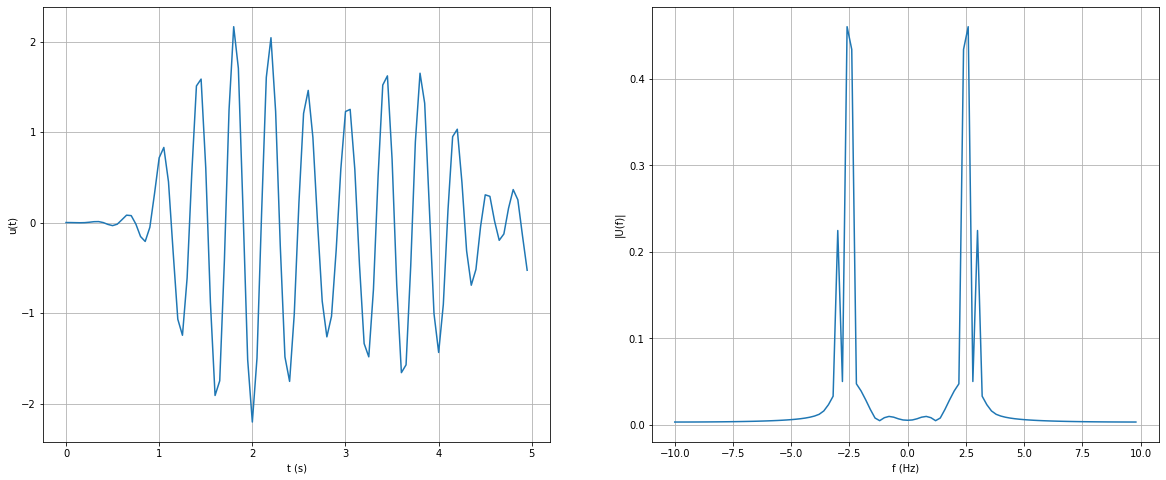

In [5]:
plots.plot_signal_and_fourier(t, u, dt)

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


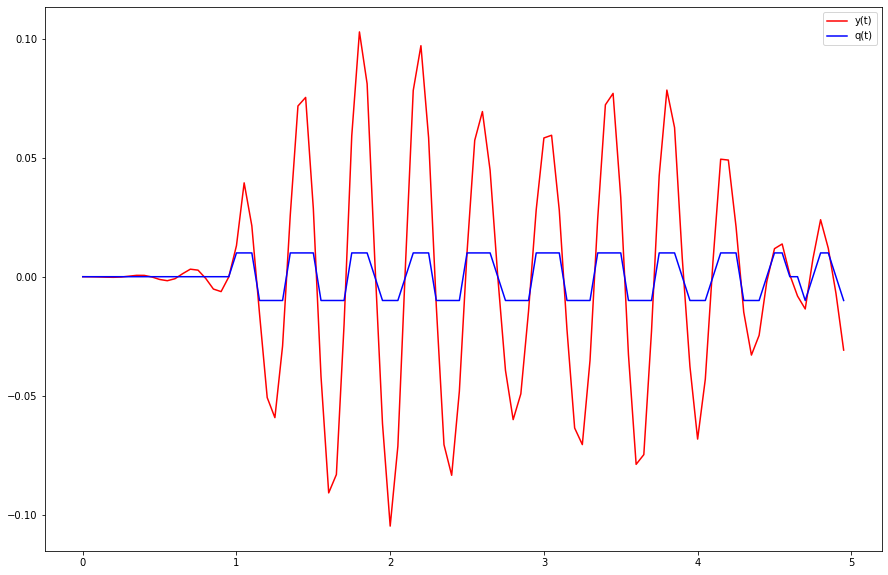

In [6]:
zs = helpers.get_spike_signal(spike_indices, q_signs, ys.shape[0], theta)
plots.plot_integral_and_spikes(t, ys, zs, 'feichtinger')

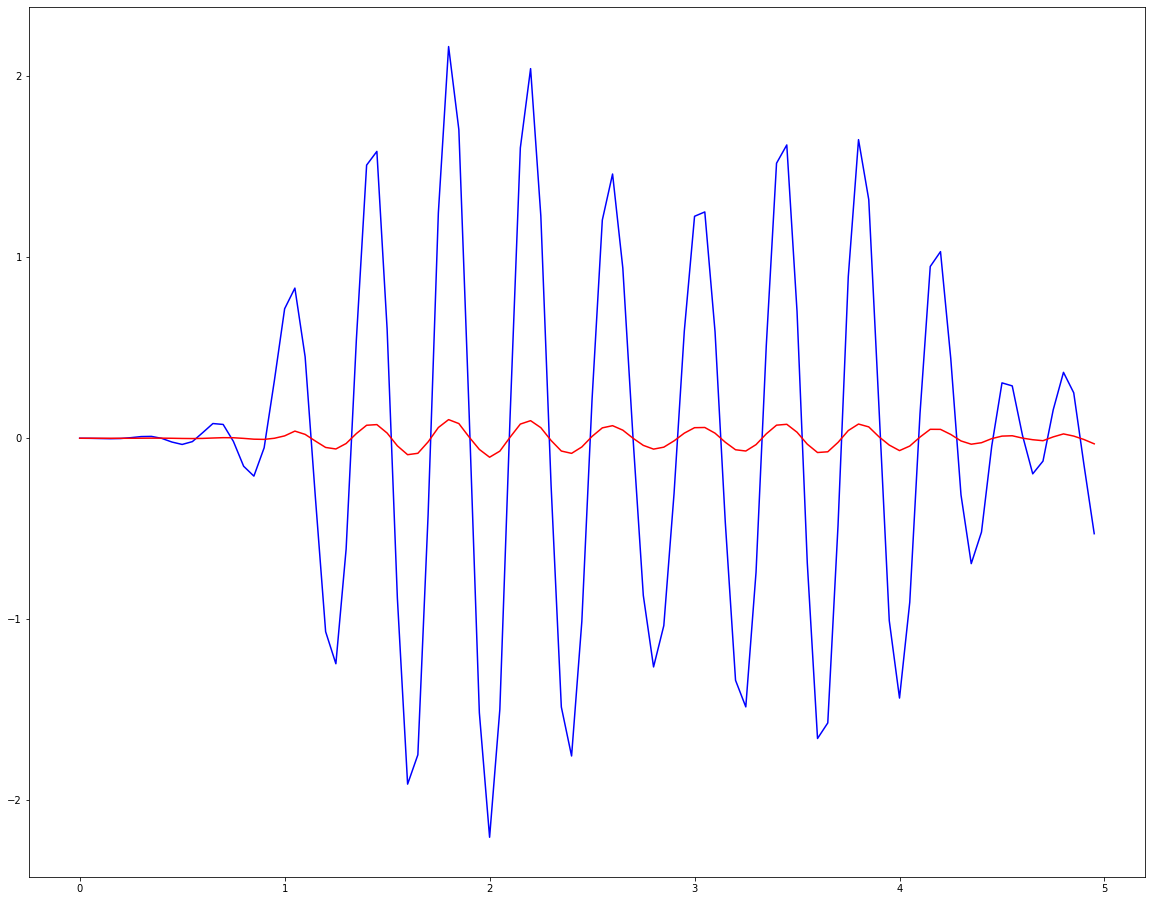

In [7]:
plt.figure(figsize=(20, 16))
plt.plot(t, u, 'b')
plt.plot(t, ys, 'r')
plt.show()

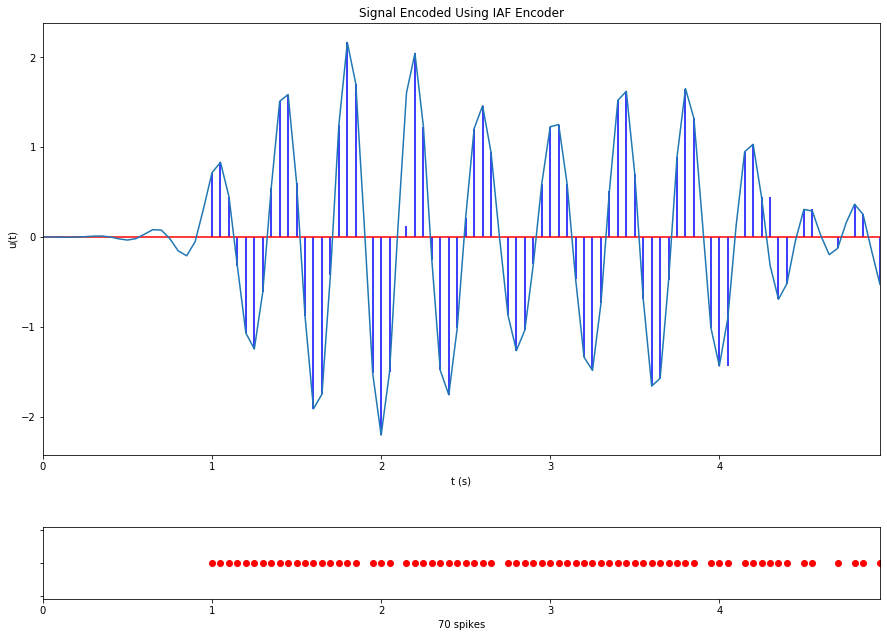

In [8]:
fig_title = 'Signal Encoded Using IAF Encoder'
ts = t[spike_indices]
plots.plot_encoded(t, u, ts, fig_title)

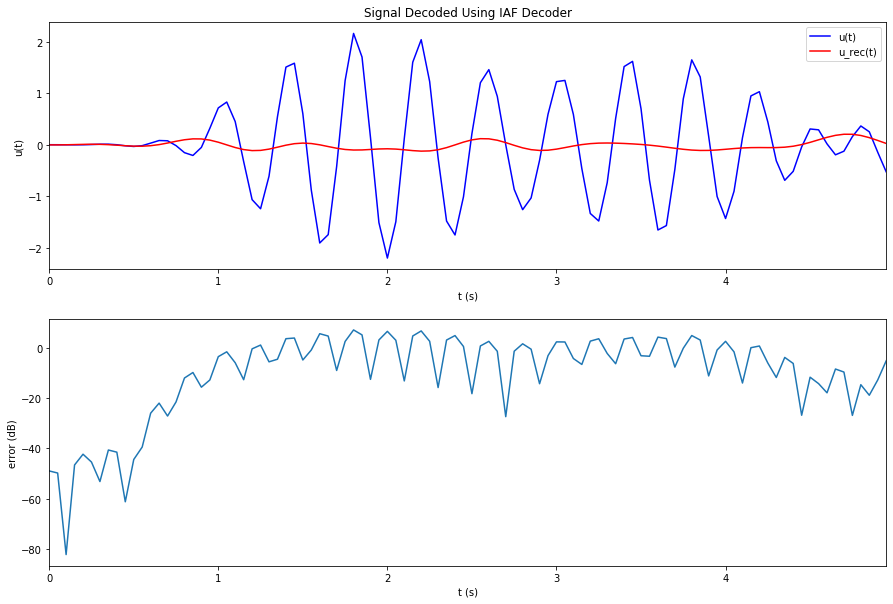

In [9]:
fig_title = 'Signal Decoded Using IAF Decoder'
plots.plot_compare(t, u, u_rec, fig_title)

# Experiments

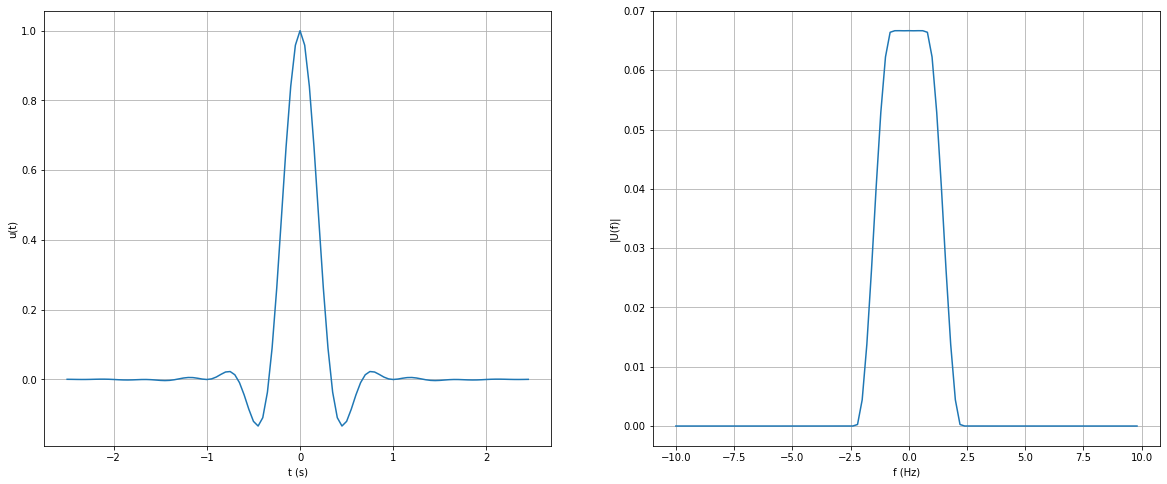

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


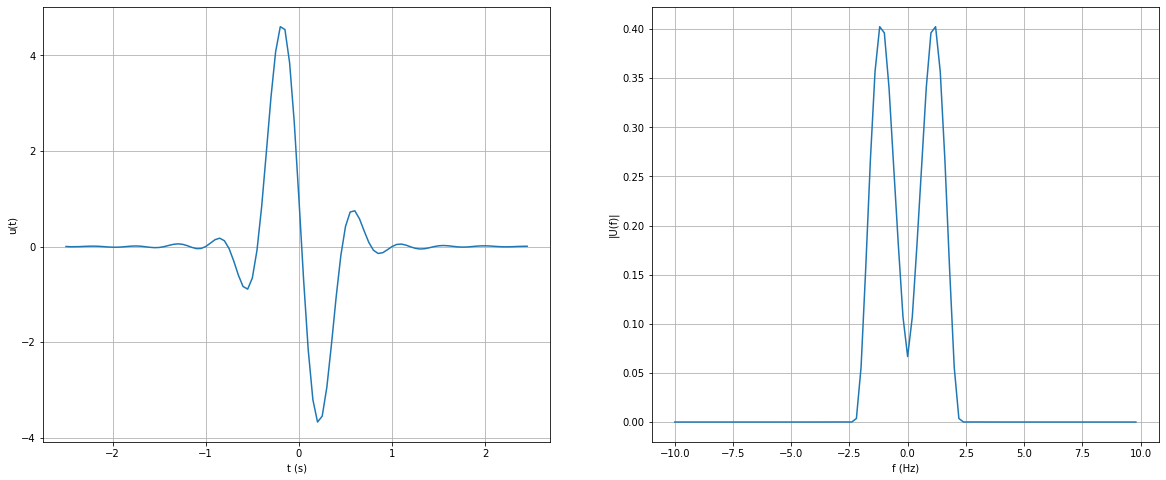

In [10]:
# Visualising both kernels :
# First : Psi (raised cosine)
# Second : Phi

phi_kernel = helpers.get_phi_from_psi(psi_kernel, len(t_0_centered), dt, alpha)
plots.plot_signal_and_fourier(t_0_centered, psi_kernel, dt)
plots.plot_signal_and_fourier(t_0_centered, phi_kernel, dt)

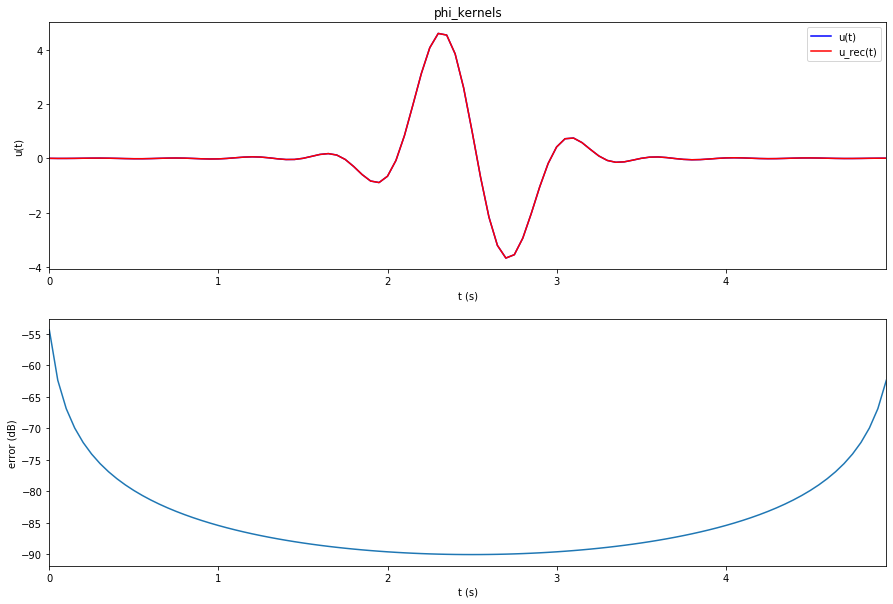

In [11]:


closed_phi_kernel = helpers.closed_phi_from_rcos(t_0_centered, gamma, Ts, alpha)
fig_title = 'phi_kernels'
plots.plot_compare(t, closed_phi_kernel, phi_kernel, fig_title)

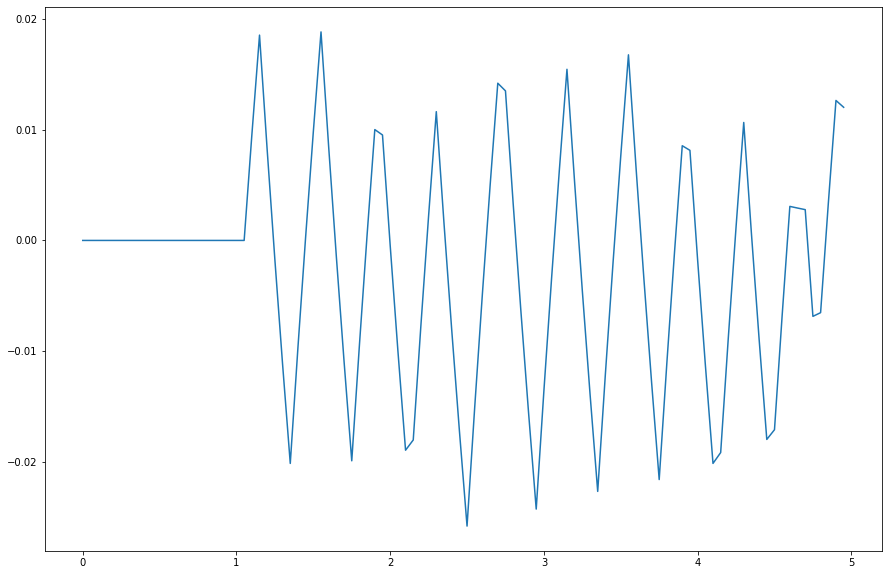

In [12]:
# Visualising Sk
plt.figure(figsize=(15, 10))
plt.plot(t, sk)

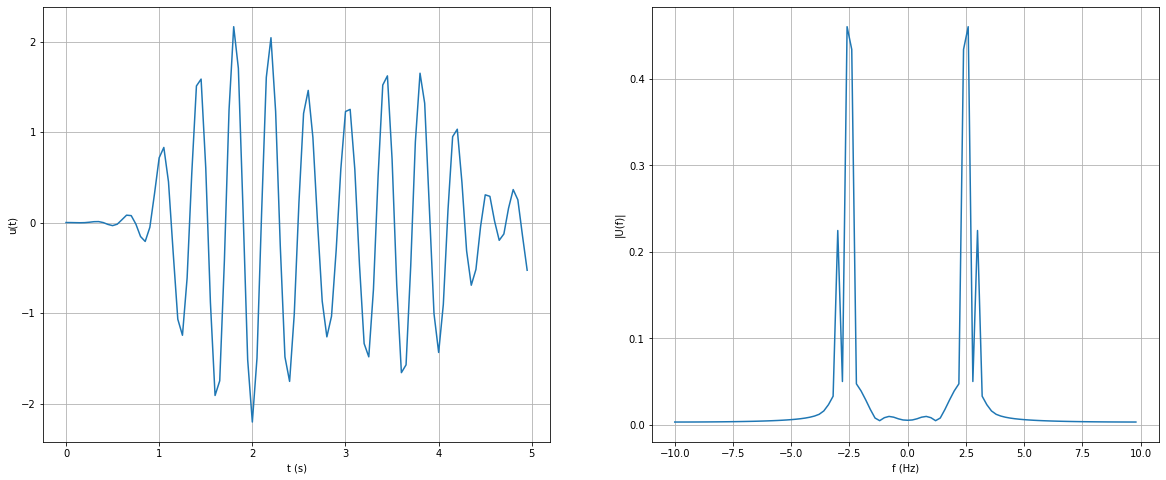

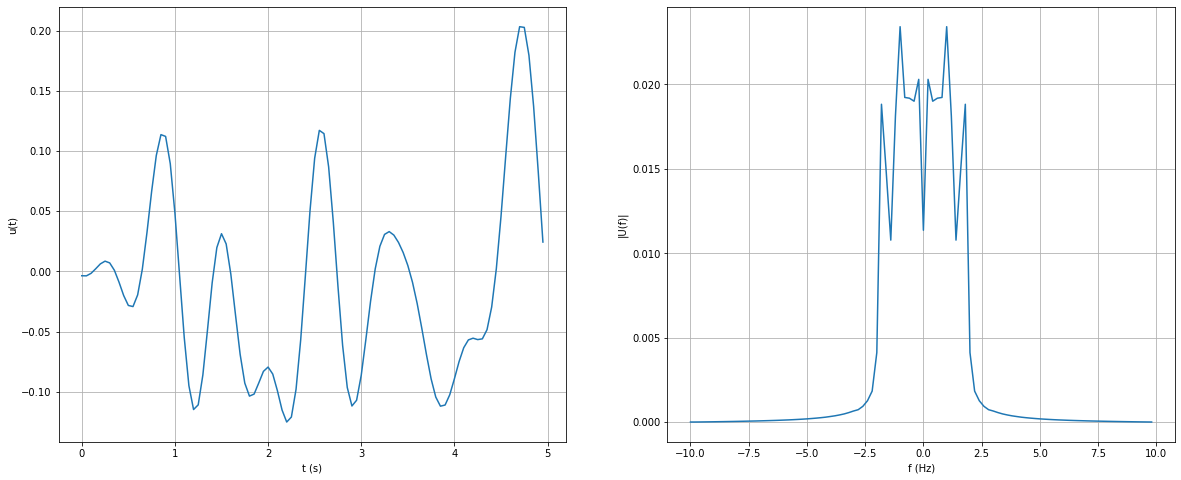

In [13]:
# Visualising both u and u_rec
# First : U (original signal)
# Second : U_rec (recovered signal)
#### Same waveforme, however amplitudes are much bigger in the recovered signal
plots.plot_signal_and_fourier(t, u, dt)
plots.plot_signal_and_fourier(t, u_rec, dt)

In [14]:
dur = 5
dt = 0.05
f = 5
u = helpers.gen_band_limited(dur, dt, f, nc=1)

In [20]:

t = np.arange(0, dur, dt)
t_0_centered = np.arange(-dur/2, dur/2, dt)

alpha = 1 # firing parameter
theta = 0.0127  # threshold

gamma = 0.99
Ts = 1/(f)

psi_kernel = helpers.rcosfilter(t_0_centered, gamma, Ts)
closed_phi_kernel = helpers.closed_phi_from_rcos(t_0_centered, gamma, Ts, alpha)

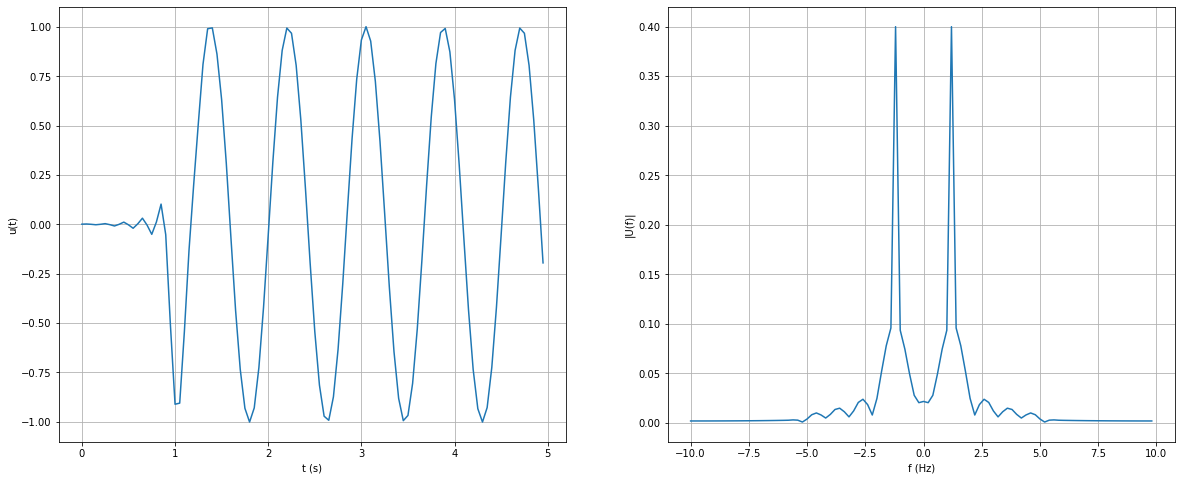

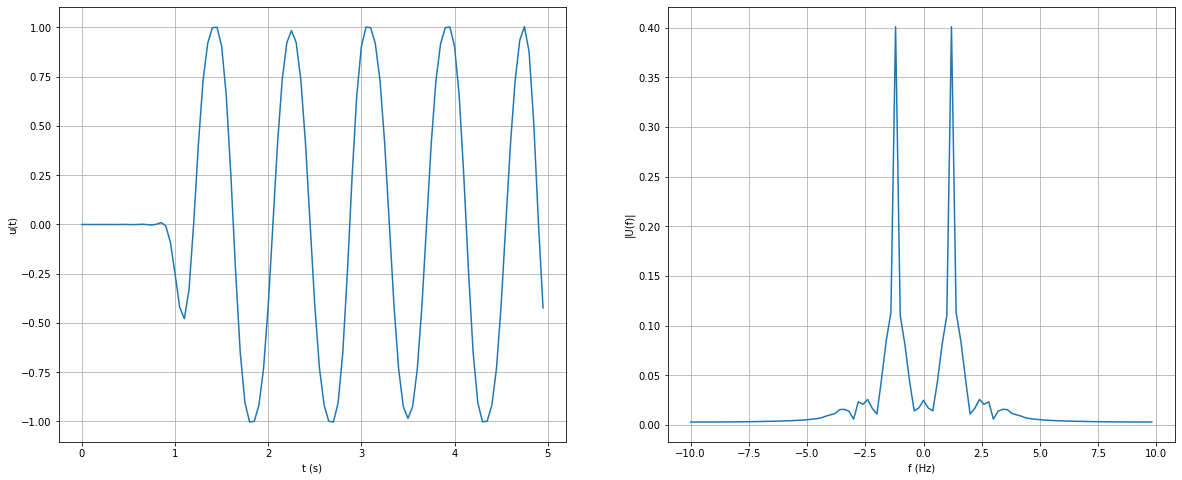

In [21]:


spike_indices, ys, q_signs = iaf.IAF_encode(u, dt, alpha, theta, t)

u_rec, sk = iaf.IAF_decode(spike_indices, q_signs, t, alpha, theta, psi_kernel, closed_phi_kernel)

plots.plot_signal_and_fourier(t, u, dt)
plots.plot_signal_and_fourier(t, u_rec, dt)

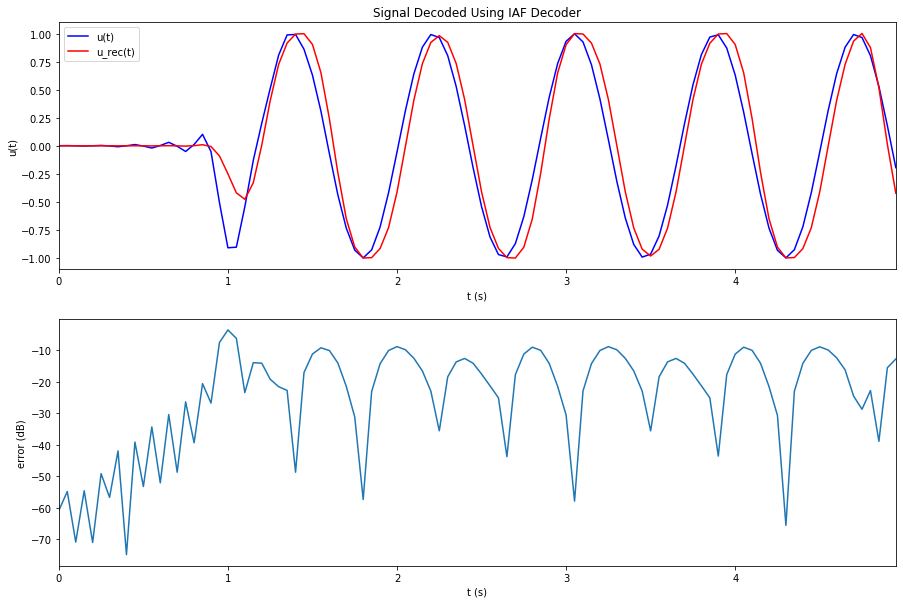

In [22]:
fig_title = 'Signal Decoded Using IAF Decoder'
plots.plot_compare(t, u, u_rec, fig_title)

80


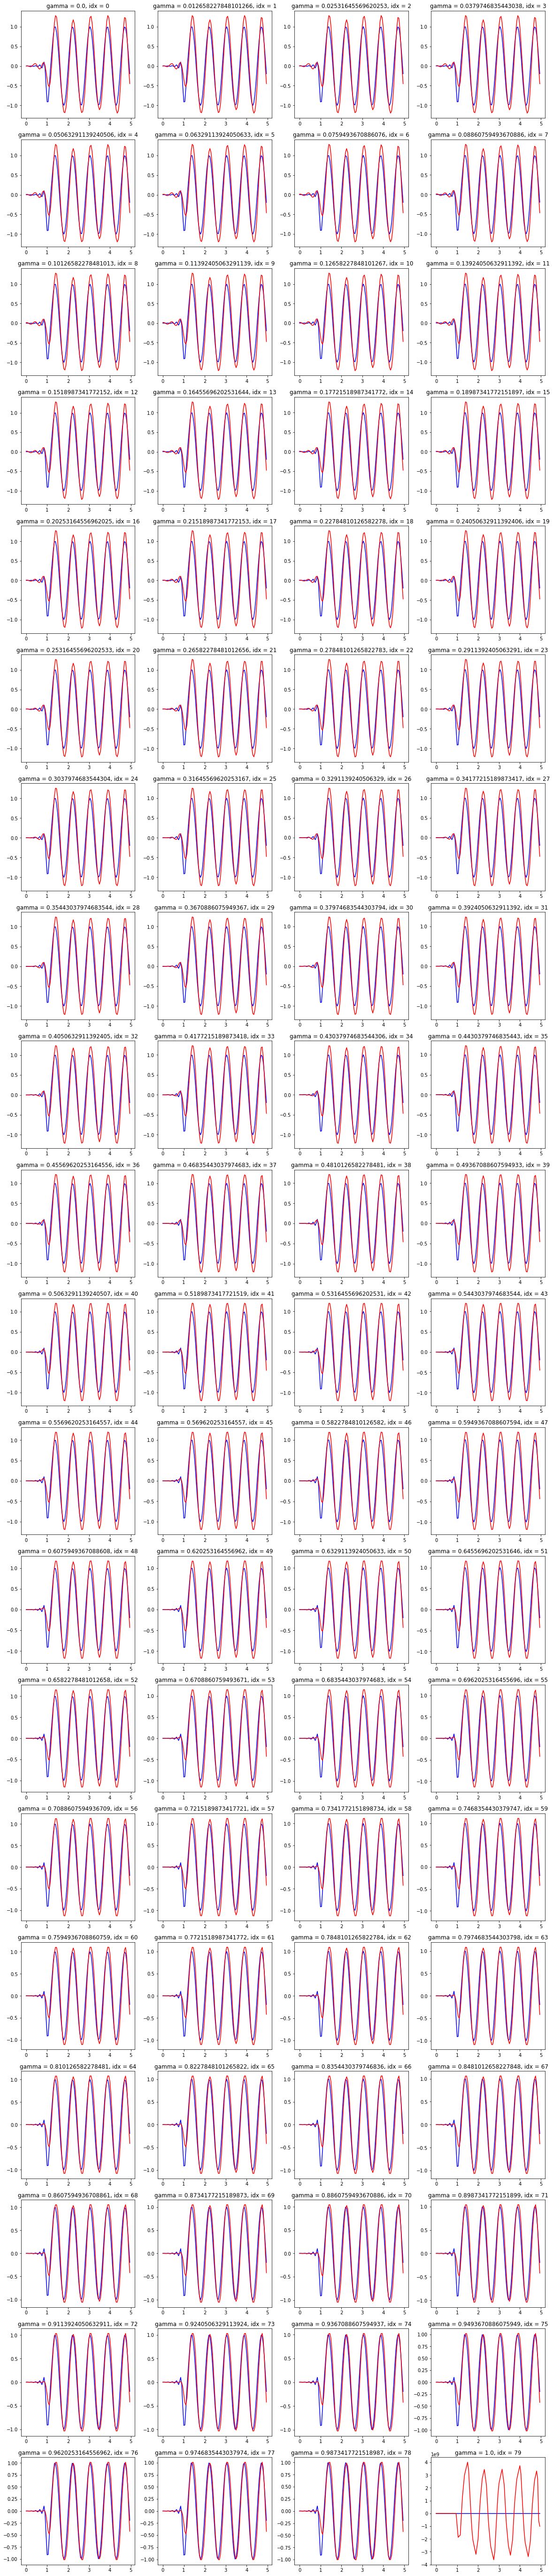

In [18]:
import itertools
# thetas = np.linspace(0, 0.015, 80)
alpha=1

# alphas = np.linspace(0.1, 10, 80)

gammas = np.linspace(0, 1, 80)

# nbx = len(alphas) * len(thetas) * len(gammas)
# nbx = len(alphas) * len(thetas)
nbx = len(gammas)
# nbx = len(alphas)
# nbx = len(thetas)
# theta = theta_opt
# alpha = alpha_opt
print(nbx)

# Ts = 1/f


plt.figure(figsize=(20, 100))
sks = []
u_recs = []

# for idx, (gamma) in enumerate(itertools.product(alphas, thetas)): 
for idx, gamma in enumerate(gammas):
# for idx, alpha in enumerate(alphas):
# for idx in range(1,20):
# for idx, theta in enumerate(thetas):
    psi_kernel = helpers.rcosfilter(t_0_centered, gamma, Ts)
    closed_phi_kernel = helpers.closed_phi_from_rcos(t_0_centered, gamma, Ts, alpha)

    spike_indices, ys, q_signs = iaf.IAF_encode(u, dt, alpha, theta, t)

    u_rec, sk = iaf.IAF_decode(spike_indices, q_signs, t, alpha, theta, psi_kernel, closed_phi_kernel)
    
    sks.append(sk)
    u_recs.append(u_rec) 
    plt.subplot(int(nbx/4), 4, idx+1)
    plt.plot(t,u,'b')
    plt.plot(t,u_rec, 'r')
#     plt.title('alpha = ' + str(round(alpha, 8)) + ', theta = ' + str(round(theta, 8)) )
    plt.title(f'gamma = {gamma}, idx = {idx}')
#     plt.title(f'alpha = {alpha}, idx = {idx}')
#     plt.title(f'Ts : idx = {idx}')
#     plt.title(f'theta = {theta}, idx = {idx}')
#     plots.plot_compare(t, u, u_rec, fig_title)
#     plt.show()

plt.show()

In [19]:
theta_opt = thetas[67]
theta_opt

NameError: name 'thetas' is not defined

In [ ]:
alpha_opt = 1

In [ ]:
gamma_opt = gammas[78]

In [ ]:
plt.figure(figsize=(20, 20))
for idx, sk in enumerate(sks):
    plt.plot(t, sk)
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
plt.plot(t, sks[7])
plt.plot(t, sks[-1])
plt.show()

In [ ]:
plt.figure(figsize=(20, 16))
plt.plot(t, u, 'b')
plt.plot(t, u_recs[1], 'r')
plt.plot(t, u_recs[-1], 'g')
plt.show()

In [ ]:
nb = len(alphas) * len(thetas)
nb/4